NLP - Yason Dawson

# NLP 1

## Tokenizer

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [2]:
sentences = [
    "I love my dog",
    "I love my cat",
    "Do you think my dog is amazing?"
    ]

In [3]:
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>") # Out of Vocab
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'my': 2, 'i': 3, 'love': 4, 'dog': 5, 'cat': 6, 'do': 7, 'you': 8, 'think': 9, 'is': 10, 'amazing': 11}


## Padding and Truncating

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = tokenizer.texts_to_sequences(sentences)

In [5]:
padded = pad_sequences(sequences, padding="post", truncating="post", maxlen=5)
padded

array([[3, 4, 2, 5, 0],
       [3, 4, 2, 6, 0],
       [7, 8, 9, 2, 5]], dtype=int32)

In [6]:
test_data = [
    "I really love my dog",
    "my dog loves my manatee"
    ]

In [7]:
test_seq = tokenizer.texts_to_sequences(test_data)
test_seq

[[3, 1, 4, 2, 5], [2, 5, 1, 2, 1]]

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded1 = pad_sequences(sequences)
padded2 = pad_sequences(sequences, padding = "post")
padded3 = pad_sequences(sequences, padding = "post", maxlen = 5)
padded4 = pad_sequences(sequences, padding = "post", truncating = "post", maxlen = 5)

In [10]:
print("First Padded :\n",padded1)
print("Second Padded :\n",padded2)
print("Third Padded :\n",padded3)
print("Fourth Padded :\n",padded4)

First Padded :
 [[ 0  0  0  3  4  2  5]
 [ 0  0  0  3  4  2  6]
 [ 7  8  9  2  5 10 11]]
Second Padded :
 [[ 3  4  2  5  0  0  0]
 [ 3  4  2  6  0  0  0]
 [ 7  8  9  2  5 10 11]]
Third Padded :
 [[ 3  4  2  5  0]
 [ 3  4  2  6  0]
 [ 9  2  5 10 11]]
Fourth Padded :
 [[3 4 2 5 0]
 [3 4 2 6 0]
 [7 8 9 2 5]]


# NLP 2

In [12]:
artikel="""Most Americans now carry some immune protection, experts said, whether from vacc
For two years, the coronavirus killed Americans on a brutal, predictable schedule: A few week
But that pattern appears to have changed. Nearly three months since an ultra-contagious set o
The spread of the virus and the number of deaths in its wake, two measures that were once yok
Because so many Americans have now been vaccinated or infected or both, they said, the number
“In previous waves, there were still substantial pockets of people who had not been vaccinate
That turn in the pandemic has nevertheless left many Americans behind.
Older people make up a larger share of Covid deaths than they did last year. The virus contin
Covid is still killing an average of 314 people daily, one-tenth the number who were dying ev
With the country’s resources for fighting the virus drying up and many Americans forgoing boo
“As the time since people got vaccinated becomes longer and longer, the efficacy of the immun
The link between Covid cases and deaths started weakening over the winter, scientists said, b
This spring, Covid has been killing fewer Americans daily than during any period except the s
By some estimates, the case fatality rate — the share of recorded Covid cases that prove dead
To account for those problems, Dr. Dowdy looked at the proportion of reported test results th
By his rough calculations, Dr. Dowdy estimated that the ratio of deaths to test positivity fe
“What we’re seeing is that the average case of Covid-19 is becoming much milder,” he said.
That is a better reflection of gains in immunity than it is of any intrinsic weakening of the
The country paid a staggering price: Some 200,000 people were killed by Covid this winter and
“Our level of community immunity heading into this wave was much higher than it’s ever been d
In the Northeast, where the Omicron subvariants first took hold this spring, deaths climbed a
But across the United States, where cases have been climbing since early April, deaths have r
“I think it’s somewhat reassuring that deaths didn’t really spike as they had during earlier
Virginia Pitzer, an epidemiologist at the Yale School of Public Health, said that shift stemm
In a country as large as the United States, every Covid wave is also a collection of staggere
Some states have also moved from reporting Covid deaths daily to doing so weekly, and they have
And some states said that so many residents had died from Covid this winter that it took them
“Our surveillance system in the U.S. is not as strong as it should be or could be,” Dr. Geral
There are a number of possible reasons that Covid deaths have not fallen even further. With i
The country’s stagnant booster campaign has also left many older people at a long distance fr
“Overall, the people who’ve been coming through with Covid are much, much less sick than they
Disparities in access to booster shots and antiviral pills have also put some Americans at hi
The number of hospitalized Covid patients is still climbing nationally, making it likely that
“Unfortunately, vaccination rates in many southern states are among the lowest in the country
Even as fewer cases turn deadly, the unprecedented number of infections this winter and sprin
Dr. Karan, of Stanford, said that he had lingering symptoms from a January bout with Covid un
In the Northeast, where cases have been falling for several weeks, Dr. Ranney said that Covid
They had also been presenting differently, she said. In previous surges, patients’ most press
“This wave feels qualitatively and quantitatively different,” Dr. Ranney said. “We’re not see"""


In [13]:
print(artikel)

Most Americans now carry some immune protection, experts said, whether from vacc
For two years, the coronavirus killed Americans on a brutal, predictable schedule: A few week
But that pattern appears to have changed. Nearly three months since an ultra-contagious set o
The spread of the virus and the number of deaths in its wake, two measures that were once yok
Because so many Americans have now been vaccinated or infected or both, they said, the number
“In previous waves, there were still substantial pockets of people who had not been vaccinate
That turn in the pandemic has nevertheless left many Americans behind.
Older people make up a larger share of Covid deaths than they did last year. The virus contin
Covid is still killing an average of 314 people daily, one-tenth the number who were dying ev
With the country’s resources for fighting the virus drying up and many Americans forgoing boo
“As the time since people got vaccinated becomes longer and longer, the efficacy of the immun
Th

In [14]:
#Case Folding
# dengan fungsi lower() yang sudah disediakan oleh Python
artikel = artikel.lower()

In [15]:
# coba tampilkan hasilnya
print(artikel)

most americans now carry some immune protection, experts said, whether from vacc
for two years, the coronavirus killed americans on a brutal, predictable schedule: a few week
but that pattern appears to have changed. nearly three months since an ultra-contagious set o
the spread of the virus and the number of deaths in its wake, two measures that were once yok
because so many americans have now been vaccinated or infected or both, they said, the number
“in previous waves, there were still substantial pockets of people who had not been vaccinate
that turn in the pandemic has nevertheless left many americans behind.
older people make up a larger share of covid deaths than they did last year. the virus contin
covid is still killing an average of 314 people daily, one-tenth the number who were dying ev
with the country’s resources for fighting the virus drying up and many americans forgoing boo
“as the time since people got vaccinated becomes longer and longer, the efficacy of the immun
th

In [16]:
# Menghapus Tanda Baca
# import library regex
import re
import string

In [18]:
#hapus angka
#artikel = re.sub(r"\d+", "", artikel)
#hapus punctuation
artikel = artikel.translate(str.maketrans("","",string.punctuation))

In [19]:
#hapus whitespace leading & trailing
artikel = artikel.strip()

In [20]:
#hapus multiple whitespace into single whitespace
artikel = re.sub('\s+',' ',artikel)
# tampilkan hasilnya
print(artikel)

most americans now carry some immune protection experts said whether from vacc for two years the coronavirus killed americans on a brutal predictable schedule a few week but that pattern appears to have changed nearly three months since an ultracontagious set o the spread of the virus and the number of deaths in its wake two measures that were once yok because so many americans have now been vaccinated or infected or both they said the number “in previous waves there were still substantial pockets of people who had not been vaccinate that turn in the pandemic has nevertheless left many americans behind older people make up a larger share of covid deaths than they did last year the virus contin covid is still killing an average of 314 people daily onetenth the number who were dying ev with the country’s resources for fighting the virus drying up and many americans forgoing boo “as the time since people got vaccinated becomes longer and longer the efficacy of the immun the link between c

In [21]:
#TOKENISASI
# import library nltk
import nltk
# download package punkt -> punctuation nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# lakukan tokenisasi
tokens = nltk.tokenize.word_tokenize(artikel)
# coba tampilkan hasilnya
print(tokens)

['most', 'americans', 'now', 'carry', 'some', 'immune', 'protection', 'experts', 'said', 'whether', 'from', 'vacc', 'for', 'two', 'years', 'the', 'coronavirus', 'killed', 'americans', 'on', 'a', 'brutal', 'predictable', 'schedule', 'a', 'few', 'week', 'but', 'that', 'pattern', 'appears', 'to', 'have', 'changed', 'nearly', 'three', 'months', 'since', 'an', 'ultracontagious', 'set', 'o', 'the', 'spread', 'of', 'the', 'virus', 'and', 'the', 'number', 'of', 'deaths', 'in', 'its', 'wake', 'two', 'measures', 'that', 'were', 'once', 'yok', 'because', 'so', 'many', 'americans', 'have', 'now', 'been', 'vaccinated', 'or', 'infected', 'or', 'both', 'they', 'said', 'the', 'number', '“', 'in', 'previous', 'waves', 'there', 'were', 'still', 'substantial', 'pockets', 'of', 'people', 'who', 'had', 'not', 'been', 'vaccinate', 'that', 'turn', 'in', 'the', 'pandemic', 'has', 'nevertheless', 'left', 'many', 'americans', 'behind', 'older', 'people', 'make', 'up', 'a', 'larger', 'share', 'of', 'covid', 'dea

In [23]:
#Menampilkan frekuensi token
# import nltk
import nltk
frekuensi_token = nltk.FreqDist(tokens)
print(frekuensi_token.most_common())

[('the', 36), ('of', 20), ('that', 15), ('covid', 14), ('in', 12), ('a', 11), ('said', 10), ('and', 10), ('“', 10), ('have', 9), ('deaths', 9), ('’', 9), ('been', 8), ('is', 8), ('americans', 7), ('people', 7), ('as', 7), ('this', 7), ('some', 6), ('number', 6), ('many', 6), ('they', 6), ('dr', 6), ('it', 6), ('to', 5), ('had', 5), ('than', 5), ('country', 5), ('s', 5), ('cases', 5), ('states', 5), ('also', 5), ('from', 4), ('for', 4), ('were', 4), ('not', 4), ('with', 4), ('winter', 4), ('at', 4), ('much', 4), ('since', 3), ('an', 3), ('virus', 3), ('so', 3), ('or', 3), ('still', 3), ('who', 3), ('has', 3), ('daily', 3), ('by', 3), ('”', 3), ('wave', 3), ('where', 3), ('are', 3), ('most', 2), ('now', 2), ('two', 2), ('killed', 2), ('but', 2), ('vaccinated', 2), ('previous', 2), ('there', 2), ('turn', 2), ('left', 2), ('older', 2), ('up', 2), ('share', 2), ('killing', 2), ('average', 2), ('longer', 2), ('weakening', 2), ('spring', 2), ('fewer', 2), ('during', 2), ('any', 2), ('case', 2

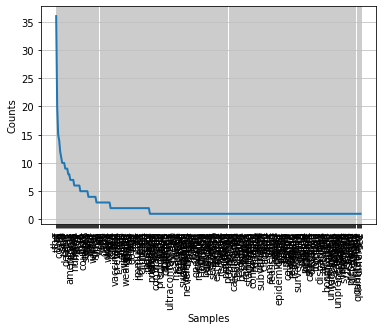

In [24]:
frekuensi_token.plot()

In [25]:
# Stopword Removal
# import nltk
import nltk
# download package punkt -> punctuation nltk
nltk.download('punkt')
# import stopwords
from nltk.corpus import stopwords
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
# lakukan tokenisasi
tokens = nltk.tokenize.word_tokenize(artikel)
# stopwords dalam bahasa Inggris
stopwords_set = set(stopwords.words('english'))
# siapkan untuk menampung hasil setelah stopwords dibuang
token_setelah_stopword = []
# siapkan untuk menampung token yang dianggap stopwords
token_stopword = []

In [30]:
# cek semua token
for token in tokens:
  if token in stopwords_set: # berarti termasuk stopword
    token_stopword.append(token)
  else:
    token_setelah_stopword.append(token)

In [31]:
# token-token yang termasuk stopword
print(token_stopword)
# token-token yang bukan stopword (dipakai untuk tahap berikutnya)
print(token_setelah_stopword)

['most', 'now', 'some', 'from', 'for', 'the', 'on', 'a', 'a', 'few', 'but', 'that', 'to', 'have', 'an', 'o', 'the', 'of', 'the', 'and', 'the', 'of', 'in', 'its', 'that', 'were', 'once', 'because', 'so', 'have', 'now', 'been', 'or', 'or', 'both', 'they', 'the', 'in', 'there', 'were', 'of', 'who', 'had', 'not', 'been', 'that', 'in', 'the', 'has', 'up', 'a', 'of', 'than', 'they', 'did', 'the', 'is', 'an', 'of', 'the', 'who', 'were', 'with', 'the', 's', 'for', 'the', 'up', 'and', 'as', 'the', 'and', 'the', 'of', 'the', 'the', 'between', 'and', 'over', 'the', 'this', 'has', 'been', 'than', 'during', 'any', 'the', 's', 'by', 'some', 'the', 'the', 'of', 'that', 'to', 'for', 'those', 'at', 'the', 'of', 'by', 'his', 'that', 'the', 'of', 'to', 'what', 'we', 're', 'is', 'that', 'the', 'of', 'is', 'he', 'that', 'is', 'a', 'of', 'in', 'than', 'it', 'is', 'of', 'any', 'of', 'the', 'the', 'a', 'some', 'were', 'by', 'this', 'and', 'our', 'of', 'into', 'this', 'was', 'than', 'it', 's', 'been', 'd', 'in

In [32]:
#Stemming
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [33]:
hasil_stemming_porter = [porter.stem(word) for word in token_setelah_stopword]
print(hasil_stemming_porter)

['american', 'carri', 'immun', 'protect', 'expert', 'said', 'whether', 'vacc', 'two', 'year', 'coronaviru', 'kill', 'american', 'brutal', 'predict', 'schedul', 'week', 'pattern', 'appear', 'chang', 'nearli', 'three', 'month', 'sinc', 'ultracontagi', 'set', 'spread', 'viru', 'number', 'death', 'wake', 'two', 'measur', 'yok', 'mani', 'american', 'vaccin', 'infect', 'said', 'number', '“', 'previou', 'wave', 'still', 'substanti', 'pocket', 'peopl', 'vaccin', 'turn', 'pandem', 'nevertheless', 'left', 'mani', 'american', 'behind', 'older', 'peopl', 'make', 'larger', 'share', 'covid', 'death', 'last', 'year', 'viru', 'contin', 'covid', 'still', 'kill', 'averag', '314', 'peopl', 'daili', 'onetenth', 'number', 'die', 'ev', 'countri', '’', 'resourc', 'fight', 'viru', 'dri', 'mani', 'american', 'forgo', 'boo', '“', 'time', 'sinc', 'peopl', 'got', 'vaccin', 'becom', 'longer', 'longer', 'efficaci', 'immun', 'link', 'covid', 'case', 'death', 'start', 'weaken', 'winter', 'scientist', 'said', 'b', 'sp

In [34]:
#Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [35]:
wordnet_lemmatizer = WordNetLemmatizer()
hasil_lemmatization = [wordnet_lemmatizer.lemmatize(word) for word in token_setelah_stopword]
print(hasil_lemmatization)

['american', 'carry', 'immune', 'protection', 'expert', 'said', 'whether', 'vacc', 'two', 'year', 'coronavirus', 'killed', 'american', 'brutal', 'predictable', 'schedule', 'week', 'pattern', 'appears', 'changed', 'nearly', 'three', 'month', 'since', 'ultracontagious', 'set', 'spread', 'virus', 'number', 'death', 'wake', 'two', 'measure', 'yok', 'many', 'american', 'vaccinated', 'infected', 'said', 'number', '“', 'previous', 'wave', 'still', 'substantial', 'pocket', 'people', 'vaccinate', 'turn', 'pandemic', 'nevertheless', 'left', 'many', 'american', 'behind', 'older', 'people', 'make', 'larger', 'share', 'covid', 'death', 'last', 'year', 'virus', 'contin', 'covid', 'still', 'killing', 'average', '314', 'people', 'daily', 'onetenth', 'number', 'dying', 'ev', 'country', '’', 'resource', 'fighting', 'virus', 'drying', 'many', 'american', 'forgoing', 'boo', '“', 'time', 'since', 'people', 'got', 'vaccinated', 'becomes', 'longer', 'longer', 'efficacy', 'immun', 'link', 'covid', 'case', 'de

In [36]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [37]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [38]:
def postag(str_data) :
  tok_sentence = nltk.word_tokenize(str_data)
  tagged_sentence = nltk.pos_tag(tok_sentence)
  return tagged_sentence
temp = postag(artikel)
print(temp)

[('most', 'JJS'), ('americans', 'NNS'), ('now', 'RB'), ('carry', 'VBP'), ('some', 'DT'), ('immune', 'JJ'), ('protection', 'NN'), ('experts', 'NNS'), ('said', 'VBD'), ('whether', 'IN'), ('from', 'IN'), ('vacc', 'NN'), ('for', 'IN'), ('two', 'CD'), ('years', 'NNS'), ('the', 'DT'), ('coronavirus', 'NN'), ('killed', 'VBD'), ('americans', 'NNS'), ('on', 'IN'), ('a', 'DT'), ('brutal', 'JJ'), ('predictable', 'JJ'), ('schedule', 'NN'), ('a', 'DT'), ('few', 'JJ'), ('week', 'NN'), ('but', 'CC'), ('that', 'IN'), ('pattern', 'JJ'), ('appears', 'VBZ'), ('to', 'TO'), ('have', 'VB'), ('changed', 'VBN'), ('nearly', 'RB'), ('three', 'CD'), ('months', 'NNS'), ('since', 'IN'), ('an', 'DT'), ('ultracontagious', 'JJ'), ('set', 'NN'), ('o', 'VBP'), ('the', 'DT'), ('spread', 'NN'), ('of', 'IN'), ('the', 'DT'), ('virus', 'NN'), ('and', 'CC'), ('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('deaths', 'NNS'), ('in', 'IN'), ('its', 'PRP$'), ('wake', 'NN'), ('two', 'CD'), ('measures', 'NNS'), ('that', 'WDT'), ('w

# IMBD Subwords (Exercise 1)

## Ungraded Lab: Subword Tokenization with the IMDB Reviews Dataset

In this lab, you will look at a pre-tokenized dataset that is using subword text encoding. This is an alternative to word-based tokenization which you have been using in the previous labs. You will see how it works and its implications on preparing your data and training your model.

Let's begin!

## Download the IMDB reviews plain text and tokenized datasets

First, you will download the [IMDB Reviews](https://www.tensorflow.org/datasets/catalog/imdb_reviews) dataset from Tensorflow Datasets. You will get two configurations:

* `plain_text` - this is the default and the one you used in Lab 1 of this week
* `subwords8k` - a pre-tokenized dataset (i.e. instead of sentences of type string, it will already give you the tokenized sequences). You will see how this looks in later sections.

In [40]:
import tensorflow_datasets as tfds

# Download the plain text default config
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Download the subword encoded pretokenized dataset
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6GWKLI/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6GWKLI/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete6GWKLI/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUY6DGN/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUY6DGN/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUY6DGN/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Compare the two datasets

As mentioned, the data types returned by the two datasets will be different. For the default, it will be strings as you also saw in Lab 1. Notice the description of the `text` key below and the sample sentences:

In [41]:
# Print description of features
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [42]:
# Take 2 training examples and print the text feature
for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

For `subwords8k`, the dataset is already tokenized so the data type will be integers. Notice that the `text` features also include an `encoder` field and has a `vocab_size` of around 8k, hence the name.

In [43]:
# Print description of features
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

If you print the results, you will not see string sentences but a sequence of tokens:

In [44]:
# Take 2 training examples and print its contents
for example in imdb_subwords['train'].take(2):
  print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

You can get the `encoder` object included in the download and use it to decode the sequences above. You'll see that you will arrive at the same sentences provided in the `plain_text` config:

In [45]:
# Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

# Take 2 training examples and decode the text feature
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

*Note: The documentation for the encoder can be found [here](https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder) but don't worry if it's marked as deprecated. As mentioned, the objective of this exercise is just to show the characteristics of subword encoding.*

## Subword Text Encoding

From previous labs, the number of tokens in the sequence is the same as the number of words in the text (i.e. word tokenization). The following cells shows a review of this process.

In [46]:
# Get the train set
train_data = imdb_plaintext['train']

# Initialize sentences list
training_sentences = []

# Loop over all training examples and save to the list
for s,_ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'

# Initialize the Tokenizer class
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer_plaintext.fit_on_texts(training_sentences)

# Generate the training sequences
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

The cell above uses a `vocab_size` of 10000 but you'll find that it's easy to find OOV tokens when decoding using the lookup dictionary it created. See the result below:

In [48]:
# Decode the first sequence using the Tokenizer class
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

For binary classifiers, this might not have a big impact but you may have other applications that will benefit from avoiding OOV tokens when training the model (e.g. text generation). If you want the tokenizer above to not have OOVs, then the `vocab_size` will increase to more than 88k. This can slow down training and bloat the model size. The encoder also won't be robust when used on other datasets which may contain new words, thus resulting in OOVs again. 

In [49]:
# Total number of words in the word index dictionary
len(tokenizer_plaintext.word_index)

88583

*Subword text encoding* gets around this problem by using parts of the word to compose whole words. This makes it more flexible when it encounters uncommon words. See how these subwords look like for this particular encoder:

In [50]:
# Print the subwords
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

If you use it on the previous plain text sentence, you'll see that it won't have any OOVs even if it has a smaller vocab size (only 8k compared to 10k above):

In [51]:
# Encode the first plaintext sentence using the subword text encoder
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)

# Decode the sequence
original_string = tokenizer_subwords.decode(tokenized_string)

# Print the result
print (original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

Subword encoding can even perform well on words that are not commonly found on movie reviews. See first the result when using the plain text tokenizer. As expected, it will show many OOVs:

In [52]:
# Define sample sentence
sample_string = 'TensorFlow, from basics to mastery'

# Encode using the plain text tokenizer
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the result
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


Then compare to the subword text encoder:

In [53]:
# Encode using the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the results
original_string = tokenizer_subwords.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


As you may notice, the sentence is correctly decoded. The downside is the token sequence is much longer. Instead of only 5 when using word-encoding, you ended up with 11 tokens instead. The mapping for this sentence is shown below:

In [54]:
# Show token to subword mapping:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_subwords.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


## Training the model

You will now train your model using this pre-tokenized dataset. Since these are already saved as sequences, you can jump straight to making uniform sized arrays for the train and test sets. These are also saved as `tf.data.Dataset` type so you can use the [`padded_batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch) method to create batches and pad the arrays into a uniform size for training.

In [55]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test splits
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

Next, you will build the model. You can just use the architecture from the previous lab. 

In [56]:
import tensorflow as tf

# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


Similarly, you can use the same parameters for training. In Colab, it will take around 20 seconds per epoch (without an accelerator) and you will reach around 94% training accuracy and 88% validation accuracy.

In [57]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 24s 58ms/step - loss: 0.6780 - accuracy: 0.5875 - val_loss: 0.6296 - val_accuracy: 0.7416
Epoch 2/10
391/391 [==============================] - 15s 38ms/step - loss: 0.5066 - accuracy: 0.8158 - val_loss: 0.4242 - val_accuracy: 0.8475
Epoch 3/10
391/391 [==============================] - 14s 36ms/step - loss: 0.3497 - accuracy: 0.8804 - val_loss: 0.3520 - val_accuracy: 0.8624
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2859 - accuracy: 0.8997 - val_loss: 0.3198 - val_accuracy: 0.8775
Epoch 5/10
391/391 [==============================] - 19s 48ms/step - loss: 0.2486 - accuracy: 0.9132 - val_loss: 0.3088 - val_accuracy: 0.8805
Epoch 6/10
391/391 [==============================] - 17s 42ms/step - loss: 0.2241 - accuracy: 0.9212 - val_loss: 0.3054 - val_accuracy: 0.8804
Epoch 7/10
391/391 [==============================] - 17s 43ms/step - loss: 0.2049 - accuracy: 0.9286 - val_loss: 0.3097 - val_accuracy:

## Visualize the results

You can use the cell below to plot the training results. See if you can improve it by tweaking the parameters such as the size of the embedding and number of epochs.

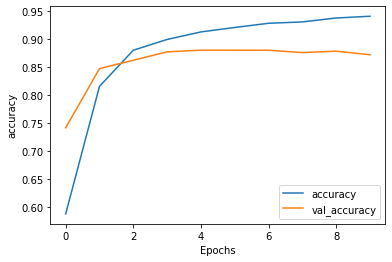

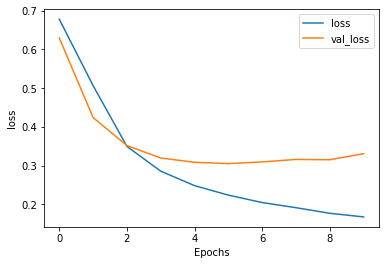

In [58]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# IMBD (Exercise 2)

## Declare All Variables

In [59]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 30

import json
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download and Setup Data

In [60]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

In [61]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

## Tokenizer

In [62]:
# Codes Here
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

## Sequence, padding, and Truncating (Preprocessing Data)

In [63]:
# Codes Here

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Create Model

In [64]:
# Codes Here

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compile Model

In [65]:
# Codes Here

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Turn List into Array

In [66]:
# Codes Here
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Fit Array

In [67]:
# Codes Here
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
782/782 - 4s - loss: 0.5267 - accuracy: 0.7410 - val_loss: 0.4061 - val_accuracy: 0.8163 - 4s/epoch - 5ms/step
Epoch 2/30
782/782 - 4s - loss: 0.3213 - accuracy: 0.8672 - val_loss: 0.3983 - val_accuracy: 0.8204 - 4s/epoch - 5ms/step
Epoch 3/30
782/782 - 4s - loss: 0.2649 - accuracy: 0.8948 - val_loss: 0.4229 - val_accuracy: 0.8148 - 4s/epoch - 5ms/step
Epoch 4/30
782/782 - 4s - loss: 0.2305 - accuracy: 0.9113 - val_loss: 0.4592 - val_accuracy: 0.8094 - 4s/epoch - 5ms/step
Epoch 5/30
782/782 - 4s - loss: 0.2052 - accuracy: 0.9230 - val_loss: 0.5097 - val_accuracy: 0.8025 - 4s/epoch - 5ms/step
Epoch 6/30
782/782 - 3s - loss: 0.1851 - accuracy: 0.9330 - val_loss: 0.5573 - val_accuracy: 0.7980 - 3s/epoch - 4ms/step
Epoch 7/30
782/782 - 3s - loss: 0.1678 - accuracy: 0.9407 - val_loss: 0.6182 - val_accuracy: 0.7902 - 3s/epoch - 4ms/step
Epoch 8/30
782/782 - 3s - loss: 0.1540 - accuracy: 0.9471 - val_loss: 0.6481 - val_accuracy: 0.7875 - 3s/epoch - 4ms/step
Epoch 9/30
782/782 - 4s 

## Predict your own sentence

In [68]:
sen = [""]
seq = tokenizer.texts_to_sequences(sen)
pad = pad_sequences(seq, padding = padding_type, truncating = trunc_type, maxlen = max_length)
print(model.predict(pad))

[[0.997127]]


## Show Accuracy and Loss

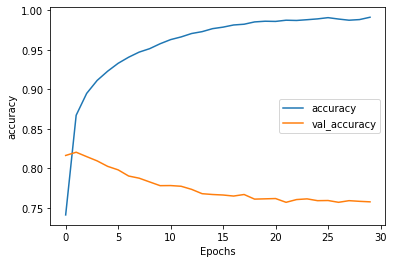

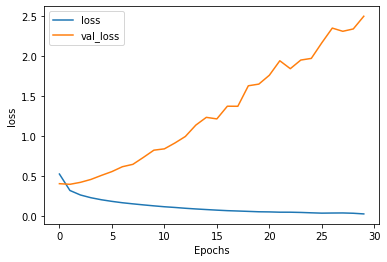

In [69]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Download the Embeddings

In [70]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [71]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [72]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## the Embeddings at https://projector.tensorflow.org/

# LSTM Method (Exercise 3)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

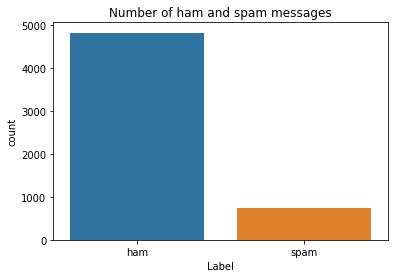

In [77]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [78]:
# Create input and output vectors.
# Process the labels
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


Process the data
- Tokenize the data and convert the text to sequences.
- Add padding to ensure that all the sequences have the same shape.
- There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [80]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [81]:
#RNN
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [82]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [83]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 10s 241ms/step - loss: 0.3418 - accuracy: 0.8725 - val_loss: 0.1730 - val_accuracy: 0.9641
Epoch 2/10
30/30 [==============================] - 7s 246ms/step - loss: 0.0939 - accuracy: 0.9760 - val_loss: 0.0637 - val_accuracy: 0.9757




The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.


In [84]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [85]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 42ms/step - loss: 0.0606 - accuracy: 0.9856


In [86]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.061
  Accuracy: 0.986


# Sarcasm_News_Solution (Exercise 4)

## Declare all variables

In [87]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 30

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download and Setup Data

In [88]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

--2022-09-14 09:56:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2022-09-14 09:56:34 (90.7 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [89]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Tokenizer

In [90]:
# Codes Here
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

## Sequence, padding, and Truncating (Preprocessing Data)

In [91]:
# Codes Here

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## Create Model

In [92]:
# Codes Here

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [94]:
# Codes Here

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Turn List into Array

In [95]:
# Codes Here

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Fit Array

In [96]:
# Codes Here

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6585 - accuracy: 0.5993 - val_loss: 0.5513 - val_accuracy: 0.7724 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 4s - loss: 0.4123 - accuracy: 0.8396 - val_loss: 0.3776 - val_accuracy: 0.8444 - 4s/epoch - 7ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3032 - accuracy: 0.8803 - val_loss: 0.3495 - val_accuracy: 0.8544 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 4s - loss: 0.2531 - accuracy: 0.8998 - val_loss: 0.3719 - val_accuracy: 0.8360 - 4s/epoch - 6ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2175 - accuracy: 0.9169 - val_loss: 0.3459 - val_accuracy: 0.8562 - 4s/epoch - 6ms/step
Epoch 6/30
625/625 - 4s - loss: 0.1904 - accuracy: 0.9276 - val_loss: 0.3559 - val_accuracy: 0.8541 - 4s/epoch - 6ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1690 - accuracy: 0.9360 - val_loss: 0.3681 - val_accuracy: 0.8533 - 3s/epoch - 6ms/step
Epoch 8/30
625/625 - 4s - loss: 0.1511 - accuracy: 0.9441 - val_loss: 0.4005 - val_accuracy: 0.8451 - 4s/epoch - 7ms/step
Epoch 9/30
625/625 - 3s 

## Predict your own sentence

In [97]:
sen = ["Never gonna give you up"]
seq = tokenizer.texts_to_sequences(sen)
pad = pad_sequences(seq, padding = padding_type, truncating = trunc_type, maxlen = max_length)
print(model.predict(pad))

[[0.6350042]]


## Show Accuracy and Loss

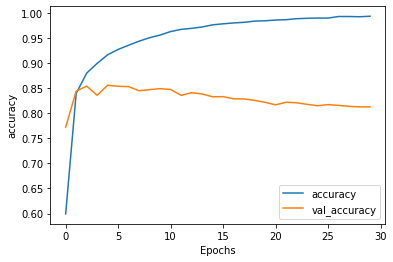

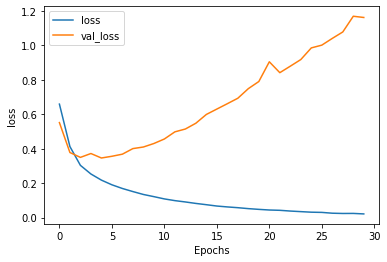

In [98]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Download the Embeddings

In [99]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [100]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [101]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>